Step1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import pywt
from scipy import linalg

Step2: Save the cover image in the same directory with name cover_img and resize it to 250*250

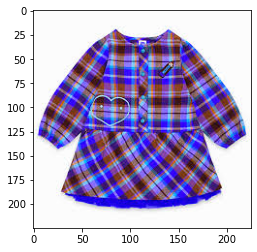

In [2]:
cover_path = !ls cover_img*
cover_img=cv2.imread(cover_path[0])
plt.imshow(cover_img)
img=cv2.resize(cover_img,(250,250))

Step3: Save the secret image in the same directory with name cover_img and resize it to 250*250

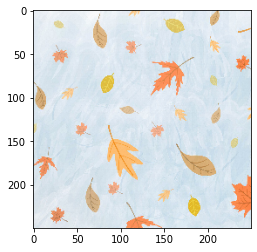

In [3]:
secret_path=!ls secret_img*
hideimg=plt.imread(secret_path[0])
hideimg=cv2.resize(hideimg,(250,250))
plt.imshow(hideimg)

Step4: Split cover image to RGB and display them

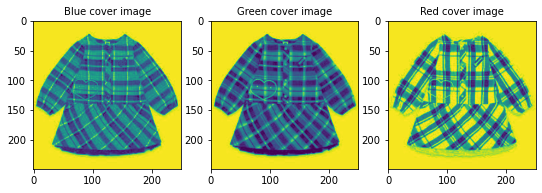

In [4]:
bimg=img[:,:,0]
gimg=img[:,:,1]
rimg=img[:,:,2]
titles = ['Blue cover image', 'Green cover image','Red cover image']
fig = plt.figure(figsize=(9, 3))
for i, a in enumerate([bimg, gimg,rimg]):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(a)
    ax.set_title(titles[i], fontsize=10)

Step4: Split secret image to RGB and display them

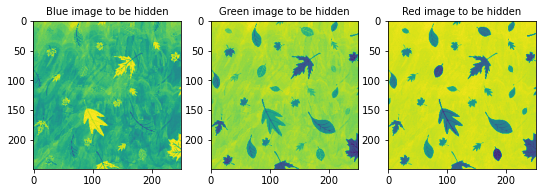

In [5]:
bhimg=hideimg[:,:,0]
ghimg=hideimg[:,:,1]
rhimg=hideimg[:,:,2]
titles = ['Blue image to be hidden', 'Green image to be hidden','Red image to be hidden']
fig = plt.figure(figsize=(9, 3))
for i, a in enumerate([bhimg, ghimg,rhimg]):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(a)
    ax.set_title(titles[i], fontsize=10)

Step5: Splitting the cover and secret image into sub-bands using 2-D Haar Transform

In [6]:
bLL,(bLH,bHL,bHH)=pywt.dwt2(bimg,'haar')
gLL,(gLH,gHL,gHH)=pywt.dwt2(gimg,'haar')
rLL,(rLH,rHL,rHH)=pywt.dwt2(rimg,'haar')
bhLL,(bhLH,bhHL,bhHH)=pywt.dwt2(bhimg,'haar')
ghLL,(ghLH,ghHL,ghHH)=pywt.dwt2(ghimg,'haar')
rhLL,(rhLH,rhHL,rhHH)=pywt.dwt2(rhimg,'haar')

Step6: Embedding the secret image sub-band in the cover image sub-band (watermarking)

In [7]:
bresultLL=0.9*bLL+0.1*bhLL
gresultLL=0.9*gLL+0.1*ghLL
rresultLL=0.9*rLL+0.1*rhLL

Step7: Merging the cover image sub-bands

In [8]:
coeffb=bresultLL,(bLH,bHL,bHH)
resultbimg=pywt.idwt2(coeffb,'haar')
coeffg=gresultLL,(gLH,gHL,gHH)
resultgimg=pywt.idwt2(coeffg,'haar')
coeffr=rresultLL,(rLH,rHL,rHH)
resultrimg=pywt.idwt2(coeffr,'haar')

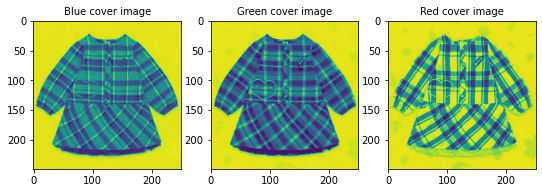

In [9]:
titles = ['Blue cover image', 'Green cover image','Red cover image']
fig = plt.figure(figsize=(9, 3))
for i, a in enumerate([resultbimg, resultgimg,resultrimg]):
    ax = fig.add_subplot(1, 3, i + 1)
    plt.imshow(a)
    ax.set_title(titles[i], fontsize=10)

Step8: Create a blank image and add image with secret image in it

In [10]:
blankimg=np.zeros((250,250,3))
blankimg[:,:,0]=resultbimg
blankimg[:,:,1]=resultgimg
blankimg[:,:,2]=resultrimg
cv2.imwrite("img_with_secret.png",blankimg)

True